<a href="https://colab.research.google.com/github/RafsanJany-44/Research-NREM-REM/blob/main/Feature_Selection_C4_All.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/krishnaik06/Feature-Selection-techniques/blob/master/Feature%20Selection.ipynb

https://www.youtube.com/watch?v=EqLBAmtKMnQ

In [5]:
Section="C4"

In [6]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
dataset = 'https://raw.githubusercontent.com/RafsanJany-44/Research-NREM-REM/main/dataset/F4_C4/REM_NREM_'+Section+'.csv'
data = pd.read_csv(dataset)
X = data.iloc[:,1:] #independent columns
y = data[['Sleep_Stage']]   #target column 

In [7]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

In [8]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [9]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [10]:
featureScores

,Specs,Score
0,MeanP_Alpha_C4,5.225929
1,MedianF_Alpha_C4,18.048726
2,MeanF_Alpha_C4,966.498298
3,Spectral Edge_Alpha_C4,602.343125
4,PeakF_Alpha_C4,77.671066
5,MeanP_Beta_C4,34.116501
6,MedianF_Beta_C4,1178.303860
7,MeanF_Beta_C4,513.436454
8,Spectral Edge_Beta_C4,923.028755
9,PeakF_Beta_C4,3802.124267


In [11]:
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                     Specs        Score
9            PeakF_Beta_C4  3802.124267
6          MedianF_Beta_C4  1178.303860
2           MeanF_Alpha_C4   966.498298
8    Spectral Edge_Beta_C4   923.028755
3   Spectral Edge_Alpha_C4   602.343125
7            MeanF_Beta_C4   513.436454
23  Spectral Edge_Gamma_C4   441.873372
24          PeakF_Gamma_C4   436.007872
22          MeanF_Gamma_C4   420.415097
18  Spectral Edge_Delta_C4   401.853100


In [12]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(featureScores.nlargest(10,'Score'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


                     Specs        Score
9            PeakF_Beta_C4  3802.124267
6          MedianF_Beta_C4  1178.303860
2           MeanF_Alpha_C4   966.498298
8    Spectral Edge_Beta_C4   923.028755
3   Spectral Edge_Alpha_C4   602.343125
7            MeanF_Beta_C4   513.436454
23  Spectral Edge_Gamma_C4   441.873372
24          PeakF_Gamma_C4   436.007872
22          MeanF_Gamma_C4   420.415097
18  Spectral Edge_Delta_C4   401.853100


In [13]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.04416459 0.0336498  0.06031184 0.04162492 0.03173295 0.04344345
 0.0563743  0.04553824 0.041262   0.03175068 0.04188146 0.03648331
 0.03873371 0.03300513 0.03026182 0.03931436 0.04053882 0.04583117
 0.05420728 0.03205893 0.04053637 0.03860661 0.04037666 0.03432593
 0.02398568]


In [14]:
#plot graph of feature importances for better visualization
#feat_importances = pd.Series(model.feature_importances_, index=X.columns)
#feat_importances.nlargest(10).plot(figsize=(20,10),kind="bar")
#plt.show()
#print(featureScores.nlargest(10,'Score'))

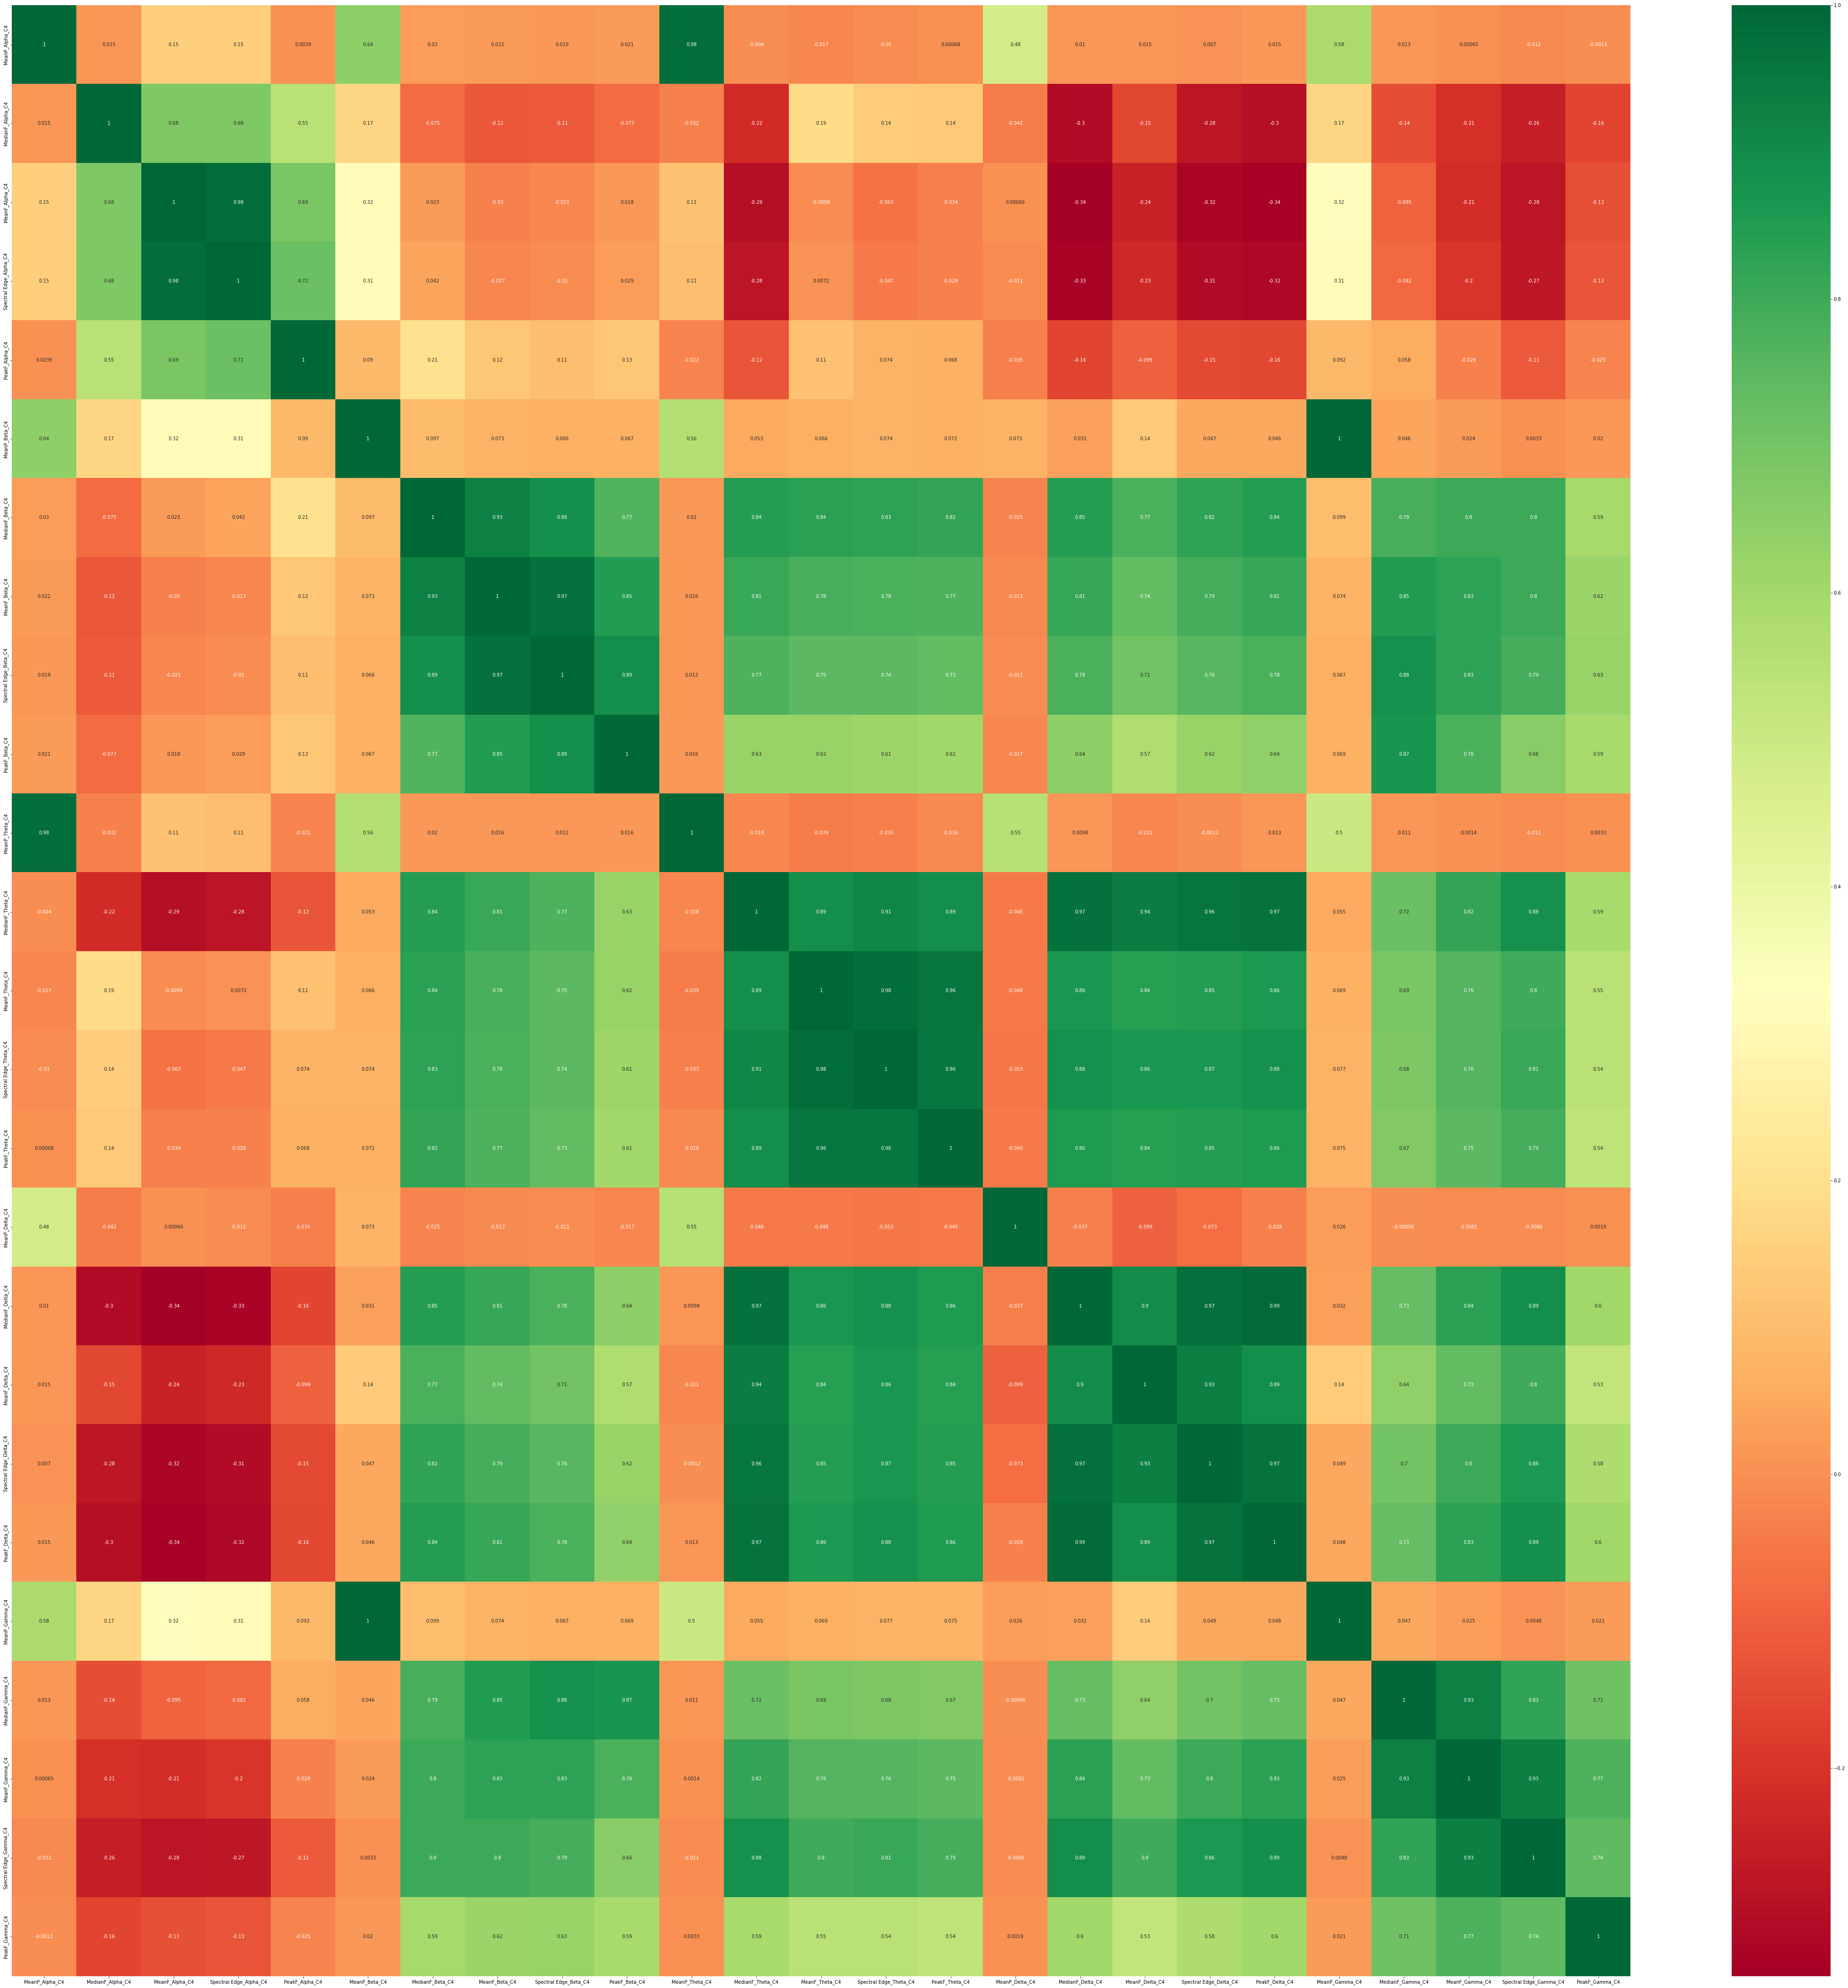

In [15]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(77,77))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

corr() is from panda and works on:
Method of correlation:

pearson : standard correlation coefficient

kendall : Kendall Tau correlation coefficient

spearman : Spearman rank correlation